#Nạp dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_train = pd.read_csv('/content/drive/MyDrive/UIT-ViNames/UIT-ViNames - Train.csv')
file_dev = pd.read_csv('/content/drive/MyDrive/UIT-ViNames/UIT-ViNames - Dev.csv')
file_test = pd.read_csv('/content/drive/MyDrive/UIT-ViNames/UIT-ViNames-Test.csv')

In [ ]:
file_train

,Full_Names,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
18790,Trần Nguyễn Tường Vy,0
18791,Phan Hải Âu,1
18792,Phạm Trương Trúc Phương,0
18793,Nguyễn Diệu Hiền,0


In [ ]:
file_train["Full_Names"]

0                  Ngô Xuân Tùng
1              Bùi Dương Thảo Vy
2                    Lưu Thế Huy
3                 Nguyễn Thị Vân
4                Dương Minh Long
                  ...           
18790       Trần Nguyễn Tường Vy
18791                Phan Hải Âu
18792    Phạm Trương Trúc Phương
18793           Nguyễn Diệu Hiền
18794       Nguyễn Đoàn Thảo Nhi
Name: Full_Names, Length: 18795, dtype: object

#Tiền xử lý dữ liệu


In [ ]:
def Split_File(file):
  i =0
  file["First_Name"]=file["Mid_Name"]=file["Last_Name"]=file["Full_Names"]
  for FULL_NAME in file.Full_Names:
    Name=FULL_NAME
    Name_Split= Name.split()
    file.First_Name[i]=Name_Split[0]
    file.Mid_Name[i]=str(Name_Split[1:-1])
    file.Last_Name[i]=Name_Split[-1]
    i=i+1

In [ ]:
Split_File(file_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
file_train

,Full_Names,Gender,First_Name,Mid_Name,Last_Name
0,Ngô Xuân Tùng,1,Ngô,['Xuân'],Tùng
1,Bùi Dương Thảo Vy,0,Bùi,"['Dương', 'Thảo']",Vy
2,Lưu Thế Huy,1,Lưu,['Thế'],Huy
3,Nguyễn Thị Vân,0,Nguyễn,['Thị'],Vân
4,Dương Minh Long,1,Dương,['Minh'],Long
...,...,...,...,...,...
18790,Trần Nguyễn Tường Vy,0,Trần,"['Nguyễn', 'Tường']",Vy
18791,Phan Hải Âu,1,Phan,['Hải'],Âu
18792,Phạm Trương Trúc Phương,0,Phạm,"['Trương', 'Trúc']",Phương
18793,Nguyễn Diệu Hiền,0,Nguyễn,['Diệu'],Hiền


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
cv = CountVectorizer()
X_train = cv.fit_transform(file_train.Mid_Name,file_train.Last_Name)
y_train = file_train.Gender
X_test = cv.transform(file_test.Full_Names)
y_test = file_test.Gender

In [ ]:
X_train

<18795x523 sparse matrix of type '<class 'numpy.int64'>'
	with 25380 stored elements in Compressed Sparse Row format>

#SVM



In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
X_train


<18795x523 sparse matrix of type '<class 'numpy.int64'>'
	with 25380 stored elements in Compressed Sparse Row format>

In [ ]:
import time 
# fit the training dataset on the classifier
start_time = time.time()

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 2.643404245376587 để huấn luyện mô hình ----


In [ ]:
# predict the labels on test dataset
predictions_SVM = SVM.predict(X_test) #y_test_pred = f(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM , y_test)*100)


SVM Accuracy Score ->  91.13594040968343


In [ ]:
from sklearn.metrics import f1_score
print(" SVM F1-score: ", f1_score(predictions_SVM, y_test, average='macro'))

 SVM F1-score ->  0.909643575486138


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_SVM))
print(confusion_matrix(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2289
           1       0.93      0.91      0.92      3081

    accuracy                           0.91      5370
   macro avg       0.91      0.91      0.91      5370
weighted avg       0.91      0.91      0.91      5370

[[2077  212]
 [ 264 2817]]


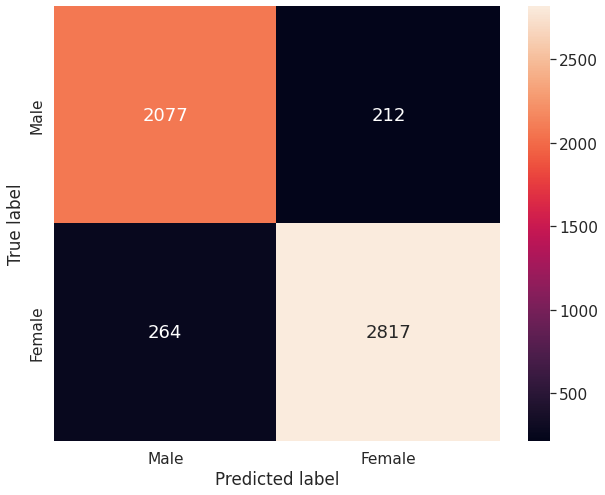

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_SVM) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Male','Female'], 
                     columns = ['Male','Female'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def gender_predict(name):
  Name = [name]
  vector = cv.transform(Name).toarray()
  if SVM.predict(vector) == 1:
    print("Giới tính: Nam")
  else:
    print("Giới tính: Nữ")

In [ ]:
gender_predict("Phan Kim Oanh")

Giới tính: Nữ


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import time 

# fit the training dataset on the classifier
start_time = time.time()

clf = DecisionTreeClassifier(random_state=0,max_depth=65)
clf.fit(X_train,y_train)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.06429314613342285 để huấn luyện mô hình ----


In [ ]:
# predict the labels on test dataset
predictions_DT = clf.predict(X_test)

# Use accuracy_score function to get the accuracy
print("DT Accuracy Score -> ",accuracy_score(predictions_DT , y_test)*100)

DT Accuracy Score ->  84.86033519553072


In [ ]:
print("F1-score: ", f1_score(predictions_DT,y_test,average='macro'))

F1-score:  0.8465108582121548


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_DT))
print(confusion_matrix(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2289
           1       0.89      0.84      0.86      3081

    accuracy                           0.85      5370
   macro avg       0.84      0.85      0.85      5370
weighted avg       0.85      0.85      0.85      5370

[[1965  324]
 [ 489 2592]]


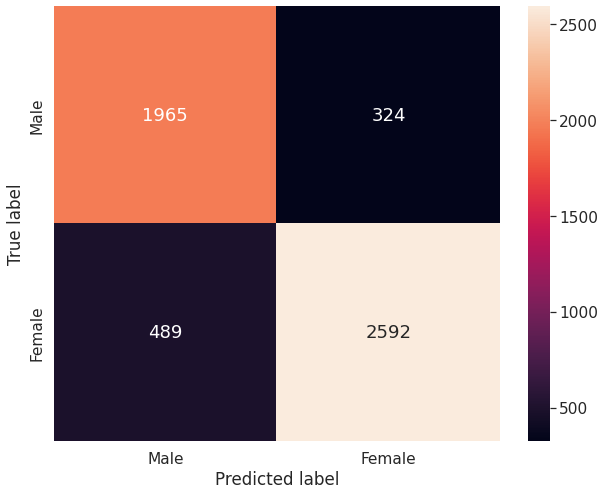

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)

# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_DT) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Male','Female'], 
                     columns = ['Male','Female'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def gender_predict(name):
  Name = [name]
  vector = cv.transform(Name).toarray()
  if clf.predict(vector) == 1:
    print("Giới tính: Nam")
  else:
    print("Giới tính: Nữ")

In [ ]:
gender_predict("Lê Việt Thắng")

Giới tính: Nam


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import time 

# fit the training dataset on the classifier
start_time = time.time()

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train,y_train)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.2378401756286621 để huấn luyện mô hình ----


In [ ]:
# predict the labels on test dataset
predictions_LR = LR.predict(X_test)

# Use accuracy_score function to get the accuracy
print("LR Accuracy Score -> ",accuracy_score(predictions_LR , y_test)*100)

LR Accuracy Score ->  90.18621973929235


In [ ]:
print("F1-score: ", f1_score(predictions_LR, y_test, average='macro'))

F1-score:  0.9009440485556488


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_LR))
print(confusion_matrix(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2289
           1       0.96      0.87      0.91      3081

    accuracy                           0.90      5370
   macro avg       0.90      0.91      0.90      5370
weighted avg       0.91      0.90      0.90      5370

[[2163  126]
 [ 401 2680]]


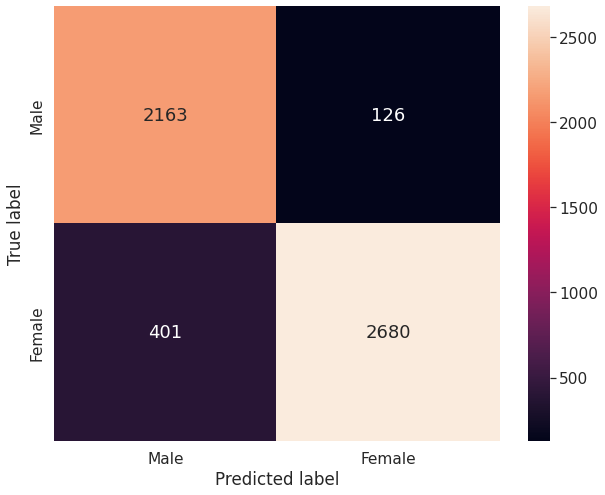

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)

# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions_LR) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Male','Female',], 
                     columns = ['Male','Female'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18},)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def gender_predict(name):
  Name = [name]
  vector = cv.transform(Name).toarray()
  if LR.predict(vector) == 1:
    print("Giới tính: Nam")
  else:
    print("Giới tính: Nữ")

In [ ]:
gender_predict("Phạm Ngô Hoàng Sinh")

Giới tính: Nam
